In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
ratings_path = '/content/rating.csv'
ratings_df = pd.read_csv(ratings_path)

In [ ]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [ ]:
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
ratings_distribution = ratings_df['rating'].value_counts().sort_index()


In [ ]:
ratings_distribution

0.5     120646
1.0     333875
1.5     137063
2.0     705758
2.5     438777
3.0    2116720
3.5    1094124
4.0    2745792
4.5     758973
5.0    1432057
Name: rating, dtype: int64

In [ ]:
ratings_per_movie = ratings_df['movieId'].value_counts().sort_index()

In [ ]:
ratings_per_movie

1         24431
2         10913
3          6294
4          1346
5          5974
          ...  
131166        1
131168        1
131231        1
131258        1
131260        1
Name: movieId, Length: 23276, dtype: int64

In [ ]:
ratings_per_user = ratings_df['userId'].value_counts()

In [ ]:
ratings_per_user

8405     7515
34576    5356
59477    4988
8963     4524
15617    4354
         ... 
19428      20
522        20
32228      20
22218      20
3158       20
Name: userId, Length: 68285, dtype: int64

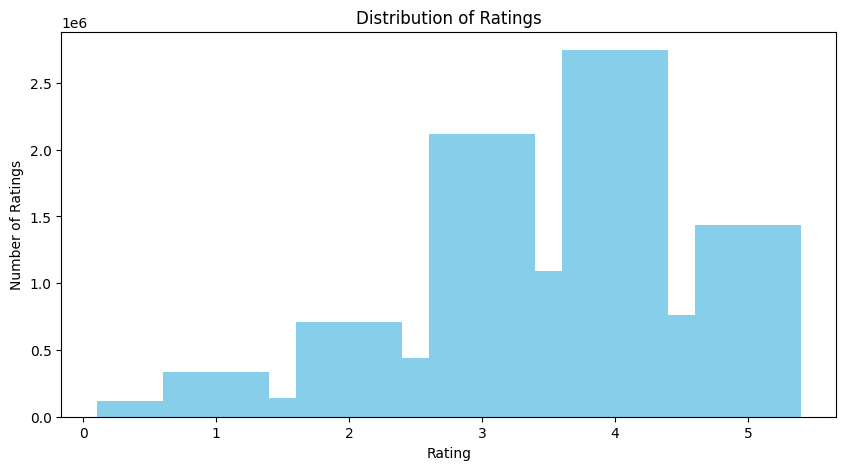

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(ratings_distribution.index, ratings_distribution.values, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()

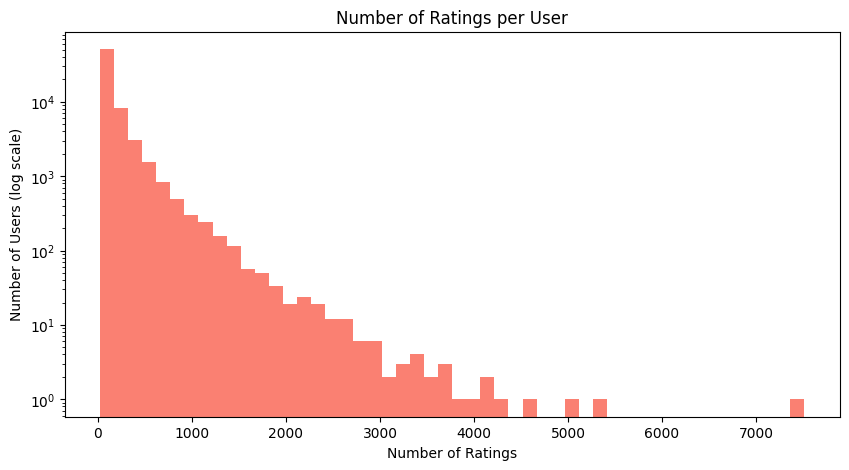

In [ ]:
# And a histogram of the number of ratings per user
plt.figure(figsize=(10, 5))
plt.hist(ratings_per_user.values, bins=50, color='salmon', log=True)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users (log scale)')
plt.show()

In [ ]:
highest_rated_movies = ratings_df.groupby('movieId')['rating'].mean().sort_values(ascending=False).head(5)

In [ ]:
print("highest-rated movies:")
print(highest_rated_movies)

highest-rated movies:
movieId
32705     5.0
102781    5.0
122425    5.0
109947    5.0
114455    5.0
Name: rating, dtype: float64


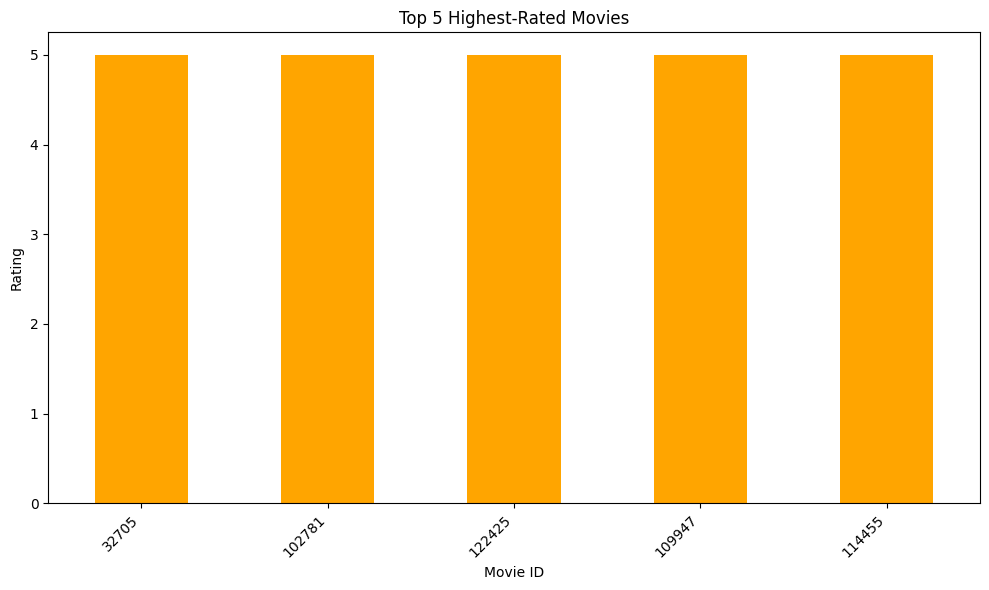

In [ ]:
plt.figure(figsize=(10, 6))
highest_rated_movies.plot(kind='bar', color='orange')
plt.title('Top 5 Highest-Rated Movies')
plt.xlabel('Movie ID')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
Lowest_rated_movies = ratings_df.groupby('movieId')['rating'].mean().sort_values(ascending=False).tail(5)

In [ ]:
print("5 lowest-rated movies:")
print(Lowest_rated_movies)

5 lowest-rated movies:
movieId
72925     0.5
113976    0.5
83660     0.5
119691    0.5
106609    0.5
Name: rating, dtype: float64


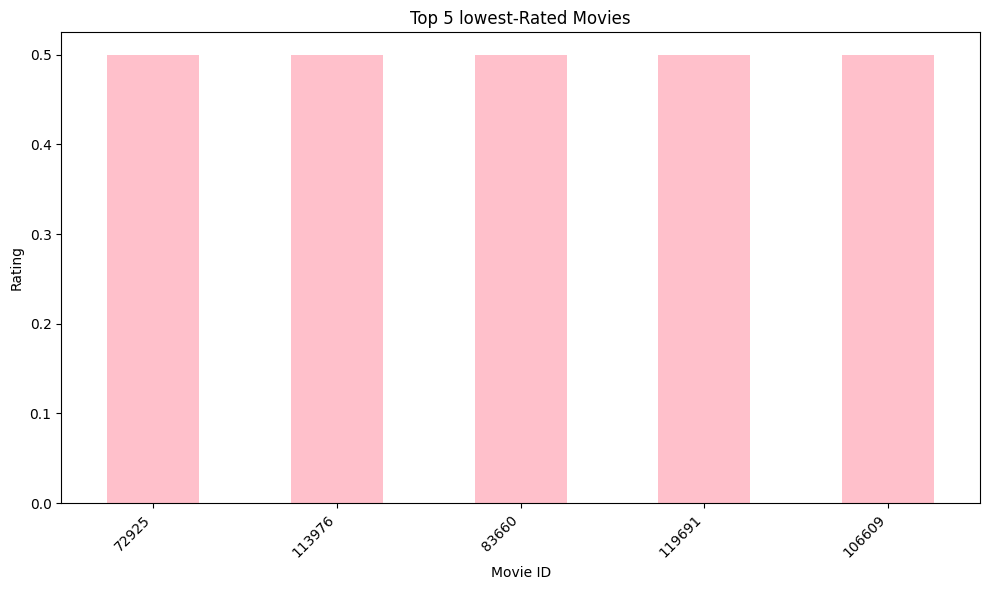

In [ ]:
plt.figure(figsize=(10, 6))
Lowest_rated_movies.plot(kind='bar', color='pink')
plt.title('Top 5 lowest-Rated Movies')
plt.xlabel('Movie ID')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [5]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix


In [6]:
train_df, temp_df = train_test_split(ratings_df, test_size=0.2, random_state=42)
dev_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)
# Create a user-item matrix for the training data using the pivot_table function.
# Rows represent users, columns represent movies, and values represent ratings.
# We fill in missing values with 0.
train_user_item_matrix = train_df.pivot_table(index='userId', columns='movieId', values='rating', fill_value=0)


In [7]:
train_user_item_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,116797,116841,117176,117511,117590,118354,118696,119141,125916,128488
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,3.5,0.0,0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0
2,0.0,0.0,4.0,0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0
3,4.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0
4,0.0,0.0,0.0,0,0.0,3.0,0.0,0,0,4.0,...,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0
5,0.0,3.0,0.0,0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0
456,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0
457,0.0,3.0,0.0,0,1.0,0.0,0.0,0,0,4.0,...,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0


In [8]:
# Convert the user-item matrix for the training data into a sparse matrix format using csr_matrix function.
# This sparse matrix representation is memory-efficient and suitable for handling large datasets.
sparse_train_user_item = csr_matrix(train_user_item_matrix)


In [10]:
sparse_train_user_item.shape

(459, 6726)

In [11]:
user_similarity = cosine_similarity(sparse_train_user_item)

In [12]:
user_similarity_df = pd.DataFrame(user_similarity, index=train_user_item_matrix.index, columns=train_user_item_matrix.index)

In [13]:
user_similarity_df

userId,1,2,3,4,5,6,7,8,9,10,...,450,451,452,453,454,455,456,457,458,459
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.106065,0.224439,0.004621,0.121680,0.033876,0.106380,0.061826,0.043333,0.135953,...,0.070992,0.115160,0.075805,0.081894,0.000000,0.117594,0.023910,0.223841,0.040774,0.099395
2,0.106065,1.000000,0.131489,0.041291,0.129737,0.060542,0.117469,0.128134,0.000000,0.102048,...,0.033984,0.066830,0.074089,0.124125,0.029180,0.028212,0.000000,0.121569,0.069139,0.080613
3,0.224439,0.131489,1.000000,0.015003,0.139001,0.047591,0.147057,0.050138,0.053268,0.198705,...,0.025330,0.129925,0.045097,0.093615,0.000000,0.063465,0.042408,0.256689,0.074721,0.107868
4,0.004621,0.041291,0.015003,1.000000,0.168387,0.048572,0.038525,0.235254,0.000000,0.000000,...,0.151230,0.000000,0.095809,0.166919,0.000000,0.025320,0.000000,0.122138,0.000000,0.012935
5,0.121680,0.129737,0.139001,0.168387,1.000000,0.249266,0.158871,0.230729,0.000000,0.182925,...,0.095439,0.060692,0.131332,0.383190,0.000000,0.004317,0.029140,0.164575,0.027541,0.089862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,0.117594,0.028212,0.063465,0.025320,0.004317,0.000000,0.036714,0.026246,0.059793,0.003881,...,0.028432,0.223415,0.023479,0.009553,0.100796,1.000000,0.063057,0.136117,0.117002,0.153902
456,0.023910,0.000000,0.042408,0.000000,0.029140,0.000000,0.078365,0.033490,0.062785,0.056539,...,0.000000,0.057918,0.022188,0.015931,0.000000,0.063057,1.000000,0.042321,0.069020,0.084196
457,0.223841,0.121569,0.256689,0.122138,0.164575,0.051317,0.169905,0.197746,0.069818,0.105788,...,0.128734,0.196372,0.092781,0.144198,0.018195,0.136117,0.042321,1.000000,0.091253,0.151858


In [14]:
def predict_rating_with_top_similarities(user_id, movie_id, user_similarity_df, train_user_item_matrix):
    # Check if the movie and user exist in the training data
    if movie_id in train_user_item_matrix.columns and user_id in user_similarity_df.index:
        # Get the similarities of the user with other users
        user_similarities = user_similarity_df.loc[user_id]
        # Get the ratings given by users for the movie
        user_ratings = train_user_item_matrix[movie_id]
        # Filter out only positive ratings and their corresponding similarities
        user_similarities = user_similarities[user_ratings > 0]
        user_ratings = user_ratings[user_ratings > 0]
        # Select the top two similarities and their corresponding user IDs
        top_similarities = user_similarities.nlargest(2)
        top_users = top_similarities.index

        # Calculate the weighted sum of ratings using the top similarities
        weighted_sum = (top_similarities * user_ratings.loc[top_users]).sum()
        # Calculate the sum of the top similarities
        sum_of_similarities = top_similarities.sum()
        # Calculate the predicted rating based on the weighted sum and sum of similarities
        predicted_rating = weighted_sum / sum_of_similarities if sum_of_similarities > 0 else 0

        return predicted_rating, top_similarities
    else:
        # If the user or movie doesn't exist in the training data, return the global mean rating
        global_mean = train_df['rating'].mean()
        return global_mean, pd.Series([float('nan'), float('nan')], index=['Similarity1', 'Similarity2'])


user_id = 1
movie_id = 4
predicted_rating, top_similarities = predict_rating_with_top_similarities(user_id, movie_id, user_similarity_df, train_user_item_matrix)

print(f'Predicted rating for user {user_id} for movie {movie_id}: {predicted_rating}')
print(f'Top two similarity scores used in the prediction: {top_similarities}')


Predicted rating for user 1 for movie 4: 2.9999999999999996
Top two similarity scores used in the prediction: userId
295    0.207846
156    0.150928
Name: 1, dtype: float64
